# The Sparks Foundation
# Graduate Rotational Internship Program
-------------------------------------------------------------------------------------------------------------------------------

## Data Science & Business Analytics Tasks

Task No 2:

Prediction using Decision Tree Algorithm

-------------------------------------------------------------------------------------------------------------------------------

### This particular Notebook is to classify the name of the species with reference to its attributes such as petal weidth, sepal lentgth etc(Classification).

* The Dataset used here containes four feature variable and a four label.
* First of all I imported the DATASET using pandas
* And I did EDA to get ome Insights on the Data 

In [1]:
import pandas as pd

data = pd.read_csv('iris.csv')

In [2]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data = data.drop(columns=['Id'])

In [4]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Sepal length and width are seemed to be normaly distributed

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

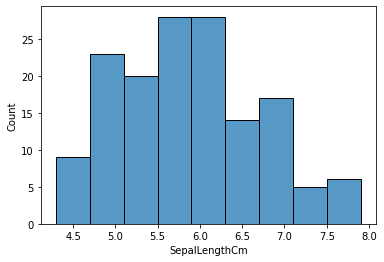

In [5]:
import seaborn as sns

sns.histplot(data['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

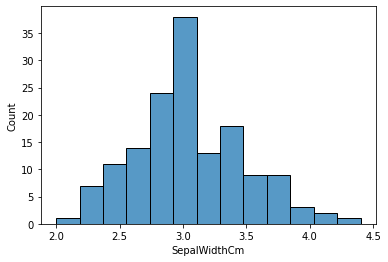

In [6]:
sns.histplot(data['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

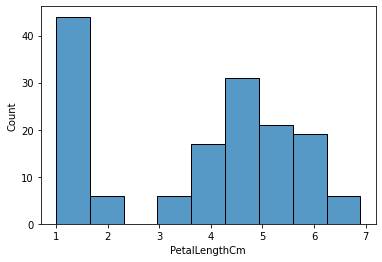

In [7]:
sns.histplot(data['PetalLengthCm'])

C:\Users\SURIYA K S\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

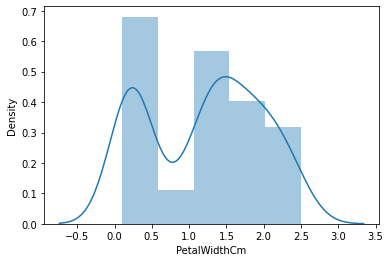

In [8]:
sns.distplot(data['PetalWidthCm'])

Labels are evenly distributed!

C:\Users\SURIYA K S\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

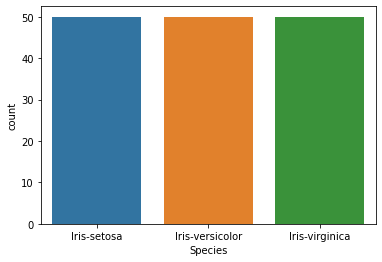

In [9]:
sns.countplot(data['Species'])

Some data points in the petalwidthcm of the species setosa, seems to be an outlier

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

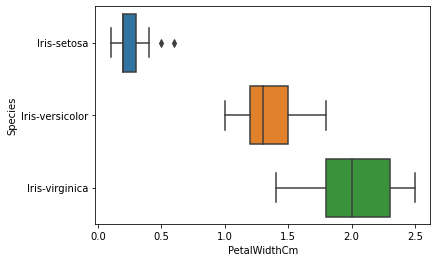

In [10]:
sns.boxplot(x="PetalWidthCm", y="Species", data=data)

C:\Users\SURIYA K S\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

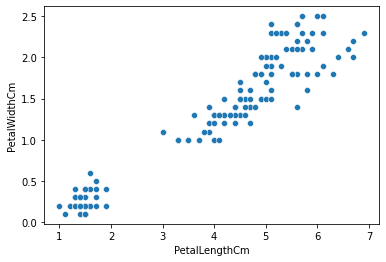

In [11]:
sns.scatterplot(data['PetalLengthCm'],data['PetalWidthCm'])

C:\Users\SURIYA K S\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


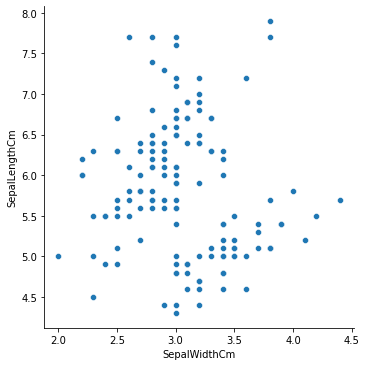

In [12]:
sns.relplot(data["SepalWidthCm"],data["SepalLengthCm"])

In [13]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
X = data.drop(columns=['Species'])
y = data.Species

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
preds = clf.predict(X_test)

In [18]:
clf.score(X_test,preds)

1.0

In [19]:
clf.predict([[5.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.499\nsamples = 91\nvalue = [0, 44, 47]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.187\nsamples = 48\nvalue = [0, 43, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

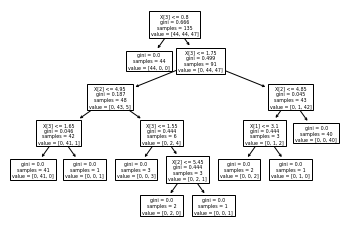

In [20]:
from sklearn import tree
tree.plot_tree(clf) 

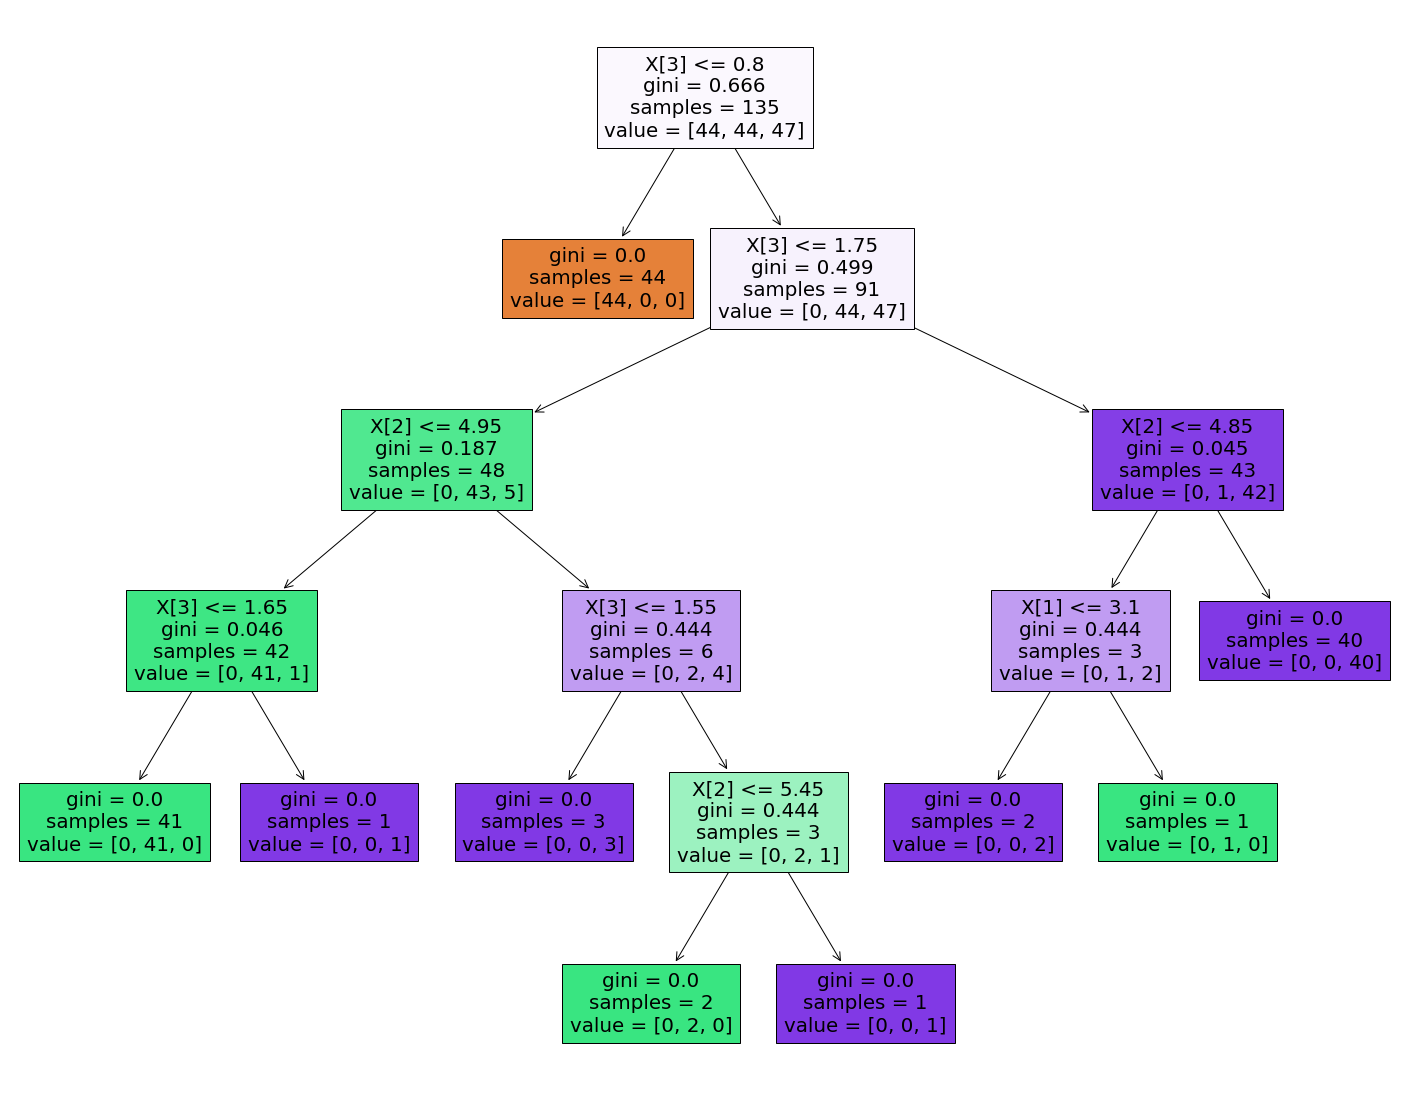

In [24]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   #feature_names=data['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   #class_names=data.target_names,
                   filled=True)